Load and Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
apps = pd.read_csv('apps.csv')
reviews = pd.read_csv('user_reviews.csv')

# Clean 'Size'
def clean_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    elif size == 'Varies with device':
        return np.nan
    else:
        try:
            return float(size)
        except:
            return np.nan

apps['Size'] = apps['Size'].astype(str).apply(clean_size)

# Clean 'Installs'
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Clean 'Price'
apps['Price'] = apps['Price'].str.replace('$', '', regex=False).astype(float)

# Drop nulls in important columns
apps = apps.dropna(subset=['Size', 'Installs', 'Price', 'Rating'])


#Step 2 :Category Distribution

/tmp/ipython-input-3-1592373370.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette='viridis')


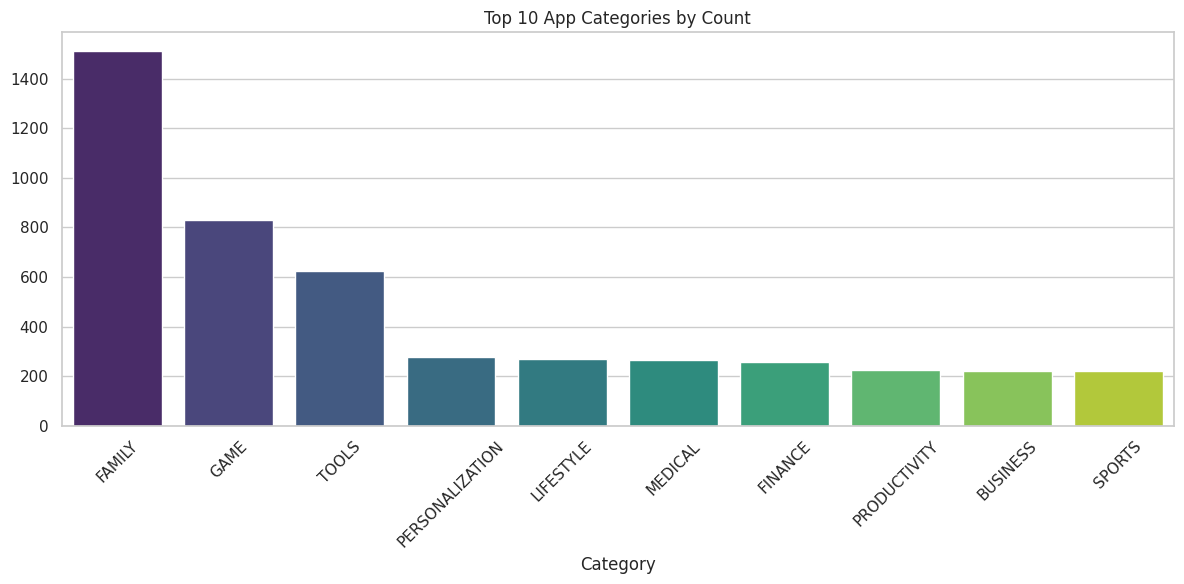

In [3]:
sns.set(style='whitegrid')
category_counts = apps['Category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette='viridis')
plt.title('Top 10 App Categories by Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/category_distribution.png', dpi=300)
plt.show()

#Step 3 :  Metrics Analysis

Plot 1: 📊 Top 10 Categories by Average Rating
Insight: Helps identify which app categories users rate the highest.

/tmp/ipython-input-4-1813544415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='coolwarm')


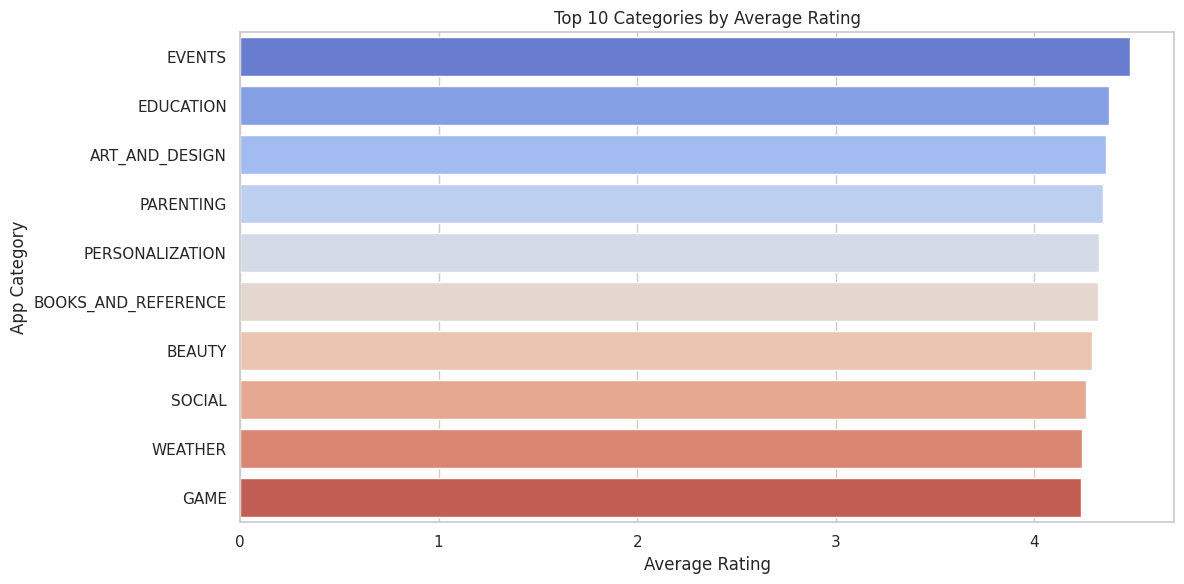

In [4]:
avg_rating = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='coolwarm')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('App Category')
plt.tight_layout()
plt.savefig('plots/top_categories_avg_rating.png', dpi=300)
plt.show()

Plot 2: 📈 Installs vs Price — Free vs Paid
Insight: Shows that free apps dominate in install numbers, paid apps are much less installed.

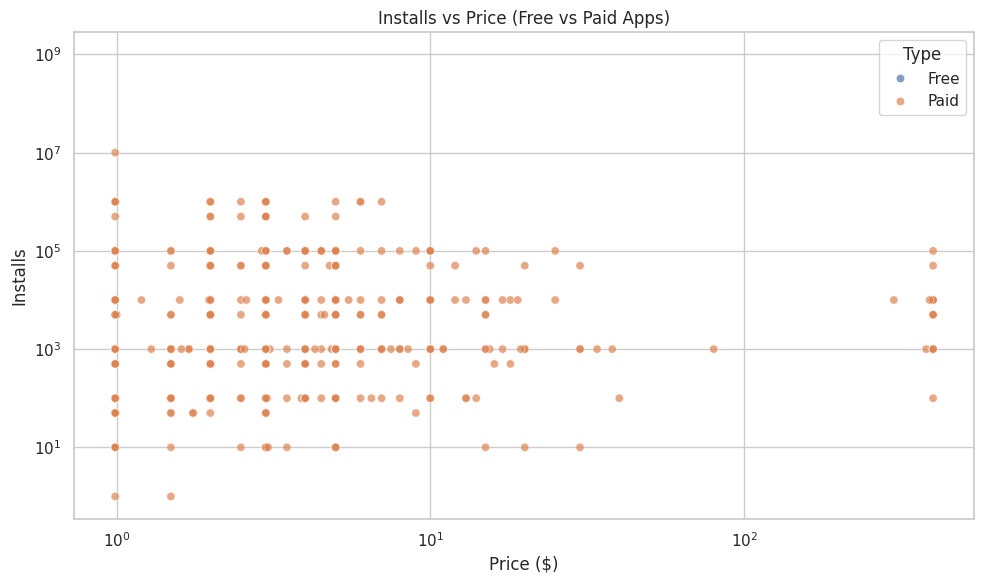

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=apps, x='Price', y='Installs', hue='Type', alpha=0.7)
plt.title('Installs vs Price (Free vs Paid Apps)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Price ($)')
plt.ylabel('Installs')
plt.tight_layout()
plt.savefig('plots/installs_vs_price.png', dpi=300)
plt.show()

# Step 4: Sentiment Analysis of Reviews

/tmp/ipython-input-6-2929558573.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='Set2')


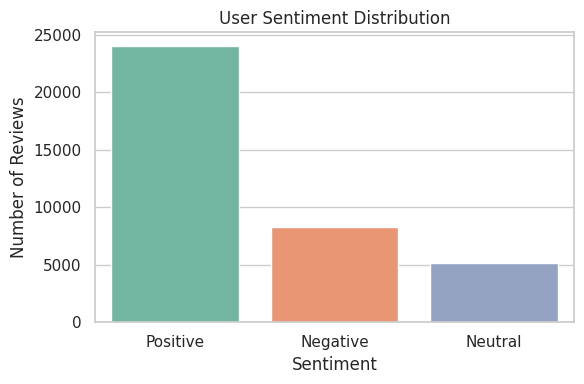

In [6]:
reviews = reviews.dropna(subset=['Sentiment'])

# Count of sentiments
sentiment_count = reviews['Sentiment'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='Set2')
plt.title('User Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.savefig('plots/sentiment_distribution.png', dpi=300)
plt.show()

#Step 5 :Integrate Learning — Interactive Visualization

In [7]:
import plotly.express as px

fig = px.scatter(apps, x="Reviews", y="Rating", color="Category", size="Installs",
                 title="App Reviews vs Ratings", hover_data=['App'])
fig.show()
fig.write_html("plots/reviews_vs_ratings.html")

# STEP 6: Skill Enhancement

🔹 Plot 1: 🎯 Rating Distribution Using KDE (Smooth Curve)

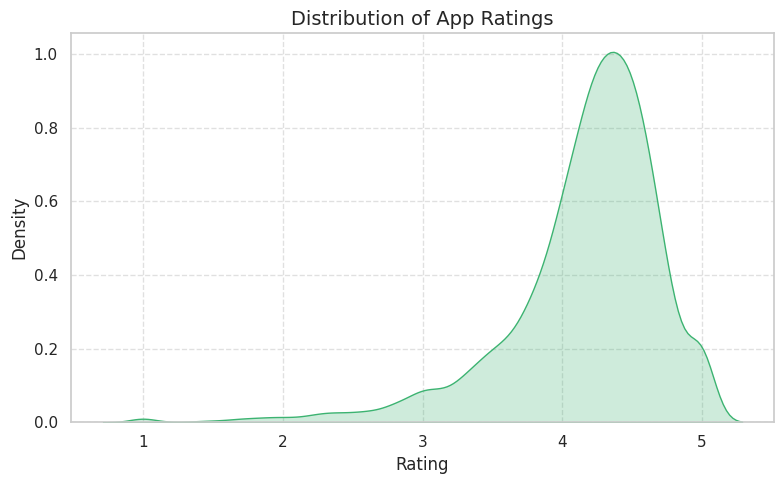

In [8]:
plt.figure(figsize=(8, 5))
sns.kdeplot(apps['Rating'], fill=True, color='mediumseagreen')
plt.title('Distribution of App Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/rating_distribution_kde.png', dpi=300)
plt.show()


🔹 Plot 2: 🌐 Interactive Bubble Chart — Category vs Rating vs Installs

In [9]:
import plotly.express as px

# Aggregate by Category
category_group = apps.groupby('Category').agg({
    'Rating': 'mean',
    'Installs': 'sum'
}).reset_index()

fig = px.scatter(category_group, x="Category", y="Rating",
                 size="Installs", color="Rating",
                 title="Category vs Rating (Bubble Size = Total Installs)",
                 size_max=60, height=500)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()
fig.write_html("plots/category_vs_rating_installs.html")
